# MODULE-5

# Naive Bayes Algorithm

In [1]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n

In [2]:
data = p.read_csv("combined_stock_data.csv")

In [3]:
data1 = p.read_csv("upload_DJIA_table.csv")

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=p.concat([data1,data],axis=1)

In [6]:
df=df.dropna()

In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close',
       'Unnamed: 0', 'Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5',
       'Top6', 'Top7', 'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13',
       'Top14', 'Top15', 'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21',
       'Top22', 'Top23', 'Top24', 'Top25', 'Para', 'Subjectivity',
       'Objectivity', 'Positive', 'Neutral', 'Negative'],
      dtype='object')

In [8]:
df.rename(columns={"Adj Close":"Adj_Close"},inplace=True)
df.rename(columns={"Unnamed: 0":"year"},inplace=True)

In [9]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj_Close', 'year',
       'Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25', 'Para', 'Subjectivity', 'Objectivity', 'Positive',
       'Neutral', 'Negative'],
      dtype='object')

In [10]:
del df["Top15"]

In [11]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj_Close', 'year',
       'Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top16',
       'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23', 'Top24',
       'Top25', 'Para', 'Subjectivity', 'Objectivity', 'Positive', 'Neutral',
       'Negative'],
      dtype='object')

In [12]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj_Close,year,Date,Label,...,Top22,Top23,Top24,Top25,Para,Subjectivity,Objectivity,Positive,Neutral,Negative
0,7/1/2016,17924.24023,18002.38086,17916.91016,17949.36914,82160000,17949.36914,1988,7/1/2016,1,...,Spain arrests three Pakistanis accused of prom...,"Venezuela, where anger over food shortages is ...",A Hindu temple worker has been killed by three...,Ozone layer hole seems to be healing - US &amp...,A 117-year-old woman in Mexico City finally re...,60.000000,40.000000,0.000000,40.000000,60.000000
1,6/30/2016,17712.75977,17930.60938,17711.80078,17929.99023,133030000,17929.99023,1987,6/30/2016,1,...,"US permitted 1,200 offshore fracks in Gulf of ...",We will be swimming in ridicule - French beach...,UEFA says no minutes of silence for Istanbul v...,Law Enforcement Sources: Gun Used in Paris Ter...,Jamaica proposes marijuana dispensers for tour...,100.000000,0.000000,100.000000,0.000000,0.000000
2,6/29/2016,17456.01953,17704.50977,17456.01953,17694.67969,106380000,17694.67969,1986,6/29/2016,1,...,Google Found Disastrous Symantec and Norton Vu...,Extremist violence on the rise in Germany: Dom...,BBC News: Labour MPs pass Corbyn no-confidence...,Tiny New Zealand town with 'too many jobs' lau...,Explosion At Airport In IstanbulYemeni former ...,80.000000,20.000000,0.000000,20.000000,80.000000
3,6/28/2016,17190.50977,17409.72070,17190.50977,17409.72070,112190000,17409.72070,1985,6/28/2016,1,...,"""Romanians for Remainians"" offering a new home...",Brexit: Gibraltar in talks with Scotland to st...,8 Suicide Bombers Strike Lebanon,Mexico's security forces routinely use 'sexual...,"2,500 Scientists To Australia: If You Want To ...",42.857143,57.142857,0.000000,57.142857,42.857143
4,6/27/2016,17355.21094,17355.21094,17063.08008,17140.24023,138740000,17140.24023,1984,6/27/2016,0,...,"Conservative MP Leave Campaigner: ""The leave c...","Economists predict UK recession, further weake...","New EU 'superstate plan by France, Germany: Cr...",Pakistani clerics declare transgender marriage...,Barclays and RBS shares suspended from trading...,33.333333,66.666667,16.666667,66.666667,16.666667


In [13]:
df.tail()

,Date,Open,High,Low,Close,Volume,Adj_Close,year,Date,Label,...,Top22,Top23,Top24,Top25,Para,Subjectivity,Objectivity,Positive,Neutral,Negative
1984,8/14/2008,11532.07031,11718.28027,11450.88965,11615.92969,159790000,11615.92969,4,8/14/2008,1,...,b'Taliban wages war on humanitarian aid workers',"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,b'All the experts admit that we should legalis...,45.454545,54.545455,36.363636,54.545455,9.090909
1985,8/13/2008,11632.80957,11633.78027,11453.33984,11532.95996,182550000,11532.95996,3,8/13/2008,0,...,b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,b' U.S. refuses Israel weapons to attack Iran:...,38.461538,61.538462,15.384615,61.538462,23.076923
1986,8/12/2008,11781.70020,11782.34961,11601.51953,11642.46973,173590000,11642.46973,2,8/12/2008,0,...,b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",b'Remember that adorable 9-year-old who sang a...,56.250000,43.750000,18.750000,43.750000,37.500000
1987,8/11/2008,11729.66992,11867.11035,11675.53027,11782.34961,183190000,11782.34961,1,8/11/2008,1,...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",b'Why wont America and Nato help us? If they w...,83.333333,16.666667,41.666667,16.666667,41.666667
1988,8/8/2008,11432.08984,11759.95996,11388.04004,11734.32031,212830000,11734.32031,0,8/8/2008,0,...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""","b""Georgia 'downs two Russian warplanes' as cou...",75.000000,25.000000,18.750000,25.000000,56.250000


In [14]:
#According to the cross-validated MCC scores, the random forest is the best-performing model, so now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [15]:
X=df[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj_Close','Subjectivity','Objectivity', 'Positive', 'Neutral', 'Negative']]
#Response variable
y = df.loc[:,'Label']   

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print("Number of training dataset: ", len(X_train))
print("Number of test dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))

Number of training dataset:  1390
Number of test dataset:  596
Total number of dataset:  1986


In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

gnb = GaussianNB()

gnb.fit(X_train,y_train)

predictNB = gnb.predict(X_test)

x=accuracy_score(y_test,predictNB)
print("Accuracy result of Naive Bayes Algorithm is",round(x*100))

print("")
print('Classification report of Naive Bayes Results:')
print("")
print(classification_report(y_test,predictNB))

print("")
cm1=confusion_matrix(y_test,predictNB)
print('Confusion Matrix result of Naive Bayes is:\n',cm1)
print("")
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print("")

accuracy = cross_val_score(gnb, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold 
print("")
print("Cross validation of Naive Bayes Algorithm is:",accuracy.mean() * 100)
NB=accuracy.mean() * 100

Accuracy result of Naive Bayes Algorithm is 56

Classification report of Naive Bayes Results:

              precision    recall  f1-score   support

           0       0.58      0.15      0.24       277
           1       0.55      0.91      0.69       319

    accuracy                           0.56       596
   macro avg       0.57      0.53      0.46       596
weighted avg       0.57      0.56      0.48       596


Confusion Matrix result of Naive Bayes is:
 [[ 42 235]
 [ 30 289]]

Sensitivity :  0.15162454873646208

Specificity :  0.9059561128526645

Cross validation test results of accuracy:
[0.53266332 0.53904282 0.5465995  0.55415617 0.55415617]

Cross validation of Naive Bayes Algorithm is: 54.53235953065073


In [18]:
def graph():
    import matplotlib.pyplot as plt
    data=[NB]
    alg="Naive Bayes"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("g"))
    plt.title("Accuracy comparison of STOCK",fontsize=15)
    plt.legend(b,data,fontsize=9)

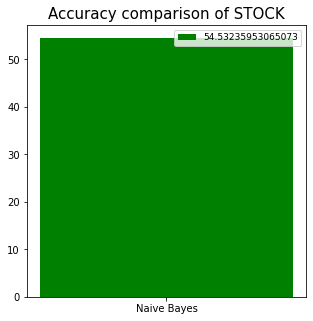

In [19]:
graph()

In [20]:
TP = cm1[0][0]
FP = cm1[1][0]
FN = cm1[1][1]
TN = cm1[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 42
True Negative : 235
False Positive : 30
False Negative : 289

True Positive Rate : 0.1268882175226586
True Negative Rate : 0.8867924528301887
False Positive Rate : 0.11320754716981132
False Negative Rate : 0.8731117824773413

Positive Predictive Value : 0.5833333333333334
Negative predictive value : 0.4484732824427481


Confusion matrix-Naive Bayes:
[[ 42 235]
 [ 30 289]]


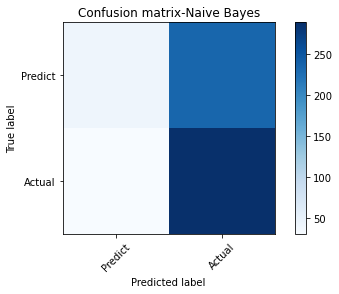

In [21]:
def plot_confusion_matrix(cm1, title='Confusion matrix-Naive Bayes', cmap=plt.cm.Blues):
    target_names=['Predict','Actual']
    plt.imshow(cm1, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = n.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm1=confusion_matrix(y_test, predictNB)
print('Confusion matrix-Naive Bayes:')
print(cm1)
plot_confusion_matrix(cm1)